# FoldX
## process both FoldX and DDGun3D

In [9]:
import pandas
import numpy
import math
from copy import deepcopy

In [10]:
foldx_df = pandas.read_csv("Ssym+_experimental.csv", index_col=0)#,usecols=['Protein', 'Mut_pdb','DDG_dir','DDG_inv','FoldX_dir','FoldX_inv']) #.drop(["Unnamed: 0","guess"], axis=1)
display(foldx_df.head())
print(foldx_df.columns)

,Protein,Mut_pdb,DDG_dir,DDG_inv,MAESTRO_dir,MAESTRO_inv,FoldX_dir,FoldX_inv,PremPS_dir,PremPS_inv,...,Mut_pdb_inv,Mut_Seq_inv,INPS3D_dir,INPS3D_inv,INPS-Seq_dir,INPS-Seq_inv,ThermoNet_dir,ThermoNet_inv,Dynamut2_dir,Dynamut2_inv
0,1amqA,C191F,-1.60,1.60,-1.290230,-2.330405,-3.458090,-1.167050,-0.70,0.83,...,F191C,F180C,-2.370220,-0.632415,-1.029200,0.505217,0.3728,-1.0064,-1.34,-2.07
1,1amqA,C191S,-1.90,1.90,-2.040645,-1.579652,0.178326,-0.117104,-1.84,1.72,...,S191C,S180C,-1.444290,-0.174529,-0.132376,0.166903,-0.0194,0.0058,-2.18,-1.60
2,1amqA,C191W,-3.90,3.90,-1.387711,-2.306045,-6.466620,-1.234990,-1.29,1.64,...,W191C,W180C,-1.855400,-1.200120,0.041922,-0.245567,0.4185,-0.0369,-1.75,-1.75
3,1amqA,C191Y,-2.30,2.30,-1.467389,-2.086929,-1.795960,0.509656,-0.76,1.66,...,Y191C,Y180C,-1.419390,-1.665550,0.069468,-0.166052,1.2850,-0.8779,-1.23,-1.24
4,1arrA,P8L,2.49,-2.49,0.427826,-0.487971,-0.710842,-5.194210,-0.13,0.31,...,L8P,L3P,-0.534797,0.027555,-0.858790,0.083820,1.0747,-0.1365,-0.73,-0.46


Index(['Protein', 'Mut_pdb', 'DDG_dir', 'DDG_inv', 'MAESTRO_dir',
       'MAESTRO_inv', 'FoldX_dir', 'FoldX_inv', 'PremPS_dir', 'PremPS_inv',
       'Dynamut_dir', 'Dynamut_inv', 'mCSM_dir', 'mCSM_inv', 'SDM_dir',
       'SDM_inv', 'DUET_dir', 'DUET_inv', 'I-Mutant3.0_dir', 'I-Mutant3.0_inv',
       'I-Mutant3.0-Seq_dir', 'I-Mutant3.0-Seq_inv', 'MUpro_dir', 'MUpro_inv',
       'SAAFEC-SEQ_dir', 'SAAFEC-SEQ_inv', 'ACDC-NN_dir', 'ACDC-NN_inv',
       'ACDC-NN-2str_dir', 'ACDC-NN-2str_inv', 'ACDC-NN-Seq_dir',
       'ACDC-NN-Seq_inv', 'PoPMuSiC_dir', 'PoPMuSiC_inv', 'DDGun3D_dir',
       'DDGun3D_inv', 'DDGun_dir', 'DDGun_inv', 'DDG', 'Ph', 'T', 'Mut_Seq',
       'Protein_inv', 'Mut_pdb_inv', 'Mut_Seq_inv', 'INPS3D_dir', 'INPS3D_inv',
       'INPS-Seq_dir', 'INPS-Seq_inv', 'ThermoNet_dir', 'ThermoNet_inv',
       'Dynamut2_dir', 'Dynamut2_inv'],
      dtype='object')


In [11]:
foldx_df = pandas.read_csv("Ssym+_experimental.csv", index_col=0,usecols=['Protein', 'Mut_pdb','Mut_pdb_inv','DDG_dir','DDG_inv','FoldX_dir','FoldX_inv','DDGun3D_dir', 'DDGun3D_inv']) #.drop(["Unnamed: 0","guess"], axis=1)
foldx_df

,Mut_pdb,DDG_dir,DDG_inv,FoldX_dir,FoldX_inv,DDGun3D_dir,DDGun3D_inv,Mut_pdb_inv
Protein,,,,,,,,
1amqA,C191F,-1.60,1.60,-3.458090,-1.167050,0.9,-1.0,F191C
1amqA,C191S,-1.90,1.90,0.178326,-0.117104,-0.5,0.4,S191C
1amqA,C191W,-3.90,3.90,-6.466620,-1.234990,1.0,-1.1,W191C
1amqA,C191Y,-2.30,2.30,-1.795960,0.509656,1.3,-1.4,Y191C
1arrA,P8L,2.49,-2.49,-0.710842,-5.194210,0.1,-0.1,L8P
...,...,...,...,...,...,...,...,...
5ptiA,F22A,-1.20,1.20,-3.354030,0.428306,-2.5,2.8,A22F
5ptiA,F45A,-6.90,6.90,-3.351550,3.440730,-4.4,3.7,A45F
5ptiA,N43G,-5.70,5.70,-1.977350,-0.783265,-1.9,1.5,G43N


In [26]:
_dir=foldx_df.iloc[:,[0,1,3, -3]].rename({'Mut_pdb': 'mut','DDG_dir': 'ddg','FoldX_dir':'foldx', 'DDGun3D_dir':'DDGun3d'},axis=1)
_dir.head()

,mut,ddg,foldx,DDGun3d
Protein,,,,
1amqA,C191F,-1.60,-3.458090,0.9
1amqA,C191S,-1.90,0.178326,-0.5
1amqA,C191W,-3.90,-6.466620,1.0
1amqA,C191Y,-2.30,-1.795960,1.3
1arrA,P8L,2.49,-0.710842,0.1


In [13]:
_dir[['ddg','foldx']].corr()

,ddg,foldx
ddg,1.000000,0.566316
foldx,0.566316,1.000000


In [25]:
_inv=foldx_df.iloc[:,[7,2,4, -2]].rename({'Mut_pdb_inv': 'mut','DDG_inv': 'ddg','FoldX_inv':'foldx',  'DDGun3D_inv': 'DDGun3d'},axis=1)
_inv.head()

,mut,ddg,foldx,DDGun3d
Protein,,,,
1amqA,F191C,1.60,-1.167050,-1.0
1amqA,S191C,1.90,-0.117104,0.4
1amqA,W191C,3.90,-1.234990,-1.1
1amqA,Y191C,2.30,0.509656,-1.4
1arrA,L8P,-2.49,-5.194210,-0.1


In [27]:
foldx_train=pandas.concat([_dir,_inv])
foldx_train.head(), foldx_train.shape

(           mut   ddg     foldx  DDGun3d
 Protein                                
 1amqA    C191F -1.60 -3.458090      0.9
 1amqA    C191S -1.90  0.178326     -0.5
 1amqA    C191W -3.90 -6.466620      1.0
 1amqA    C191Y -2.30 -1.795960      1.3
 1arrA      P8L  2.49 -0.710842      0.1,
 (704, 4))

,ddg,foldx,DDGun3d
ddg,1.000000,0.50851,0.661139
foldx,0.508510,1.00000,0.360790
DDGun3d,0.661139,0.36079,1.000000


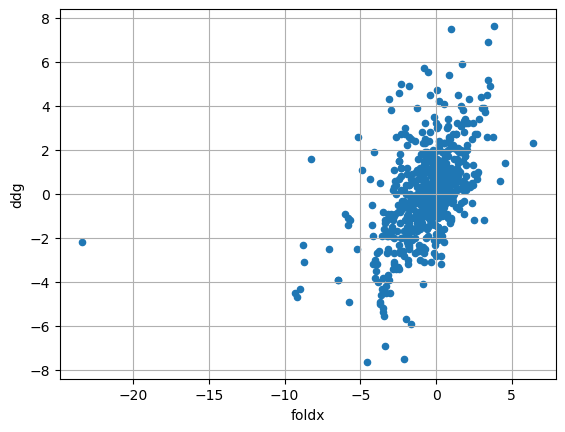

In [29]:
plain_foldx_plot= foldx_train.plot.scatter(x="foldx", y="ddg", grid=True)
foldx_train[['ddg','foldx','DDGun3d']].corr()

In [30]:
from sklearn.metrics import mean_squared_error
print('RMSE(foldx):',math.sqrt(mean_squared_error(foldx_train['ddg'],foldx_train['foldx'])))
print('RMSE(ddgun3d):',math.sqrt(mean_squared_error(foldx_train['ddg'],foldx_train['DDGun3d'])))

RMSE(foldx): 2.0716969980621114
RMSE(ddgun3d): 1.4730583329497604


## ddFEP

In [47]:
import math
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [48]:
aa_labels = [
    "A",
    "R",
    "N",
    "D",
    "C",
    "Q",
    "E",
    "G",
    "H",
    "I",
    "L",
    "K",
    "M",
    "F",
    "P",
    "S",
    "T",
    "W",
    "Y",
    "V",
]

In [49]:
def expand_mut(x):
    x["from_aa"] = x["mut"][0]
    x["position"] = x["mut"][1:-1]
    x["to_aa"] = x["mut"][-1]
    return x

In [50]:
ddfep_opt =foldx_train.apply(expand_mut, axis=1)

In [51]:
#ddfep_opt = deepcopy(foldx_train)
for _ in sorted(aa_labels):
    ddfep_opt[_] = 0
ddfep_opt

,mut,ddg,foldx,from_aa,position,to_aa,A,C,D,E,...,M,N,P,Q,R,S,T,V,W,Y
Protein,,,,,,,,,,,,,,,,,,,,,
1amqA,C191F,-1.60,-3.458090,C,191,F,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1amqA,C191S,-1.90,0.178326,C,191,S,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1amqA,C191W,-3.90,-6.466620,C,191,W,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1amqA,C191Y,-2.30,-1.795960,C,191,Y,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1arrA,P8L,2.49,-0.710842,P,8,L,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5ptiA,A22F,1.20,0.428306,A,22,F,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5ptiA,A45F,6.90,3.440730,A,45,F,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5ptiA,G43N,5.70,-0.783265,G,43,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
def encode_mutation(x):
    x[x['from_aa']]= -1
    x[x['to_aa']] = 1
    return x

In [53]:
ddfep_opt = ddfep_opt.apply(encode_mutation, axis='columns')
ddgun_train=deepcopy(ddfep_opt)

In [54]:
### fit test

In [55]:
X_optfep= ddfep_opt[['foldx']+sorted(aa_labels)].to_numpy()
y=ddfep_opt['ddg'].to_numpy()
X_optfep.shape, y.shape

((704, 21), (704,))

In [56]:
dd_optfep_model = LinearRegression(fit_intercept=True).fit(
    X_optfep,
    y,
)

In [57]:
dd_optfep_model.coef_, dd_optfep_model.intercept_, math.sqrt(dd_optfep_model.score(X_optfep, y))

(array([ 0.37858036, -0.54054075,  0.70761949, -0.69824387, -0.16116188,
         0.49007102, -1.10332794, -1.01372326,  1.16083963, -0.85893862,
         0.59768925,  0.02392008, -0.1881587 , -0.78925165,  0.11418728,
         1.19638833, -0.40712177,  0.6380006 ,  0.61397424, -0.83282844,
         1.05060697]),
 0.21802351451321889,
 0.683086751918111)

In [58]:
ddfep_opt['ddfep_opt']=dd_optfep_model.predict(X_optfep)

RMSE: 1.4329416649160365


,ddg,ddfep_opt
ddg,1.000000,0.683087
ddfep_opt,0.683087,1.000000


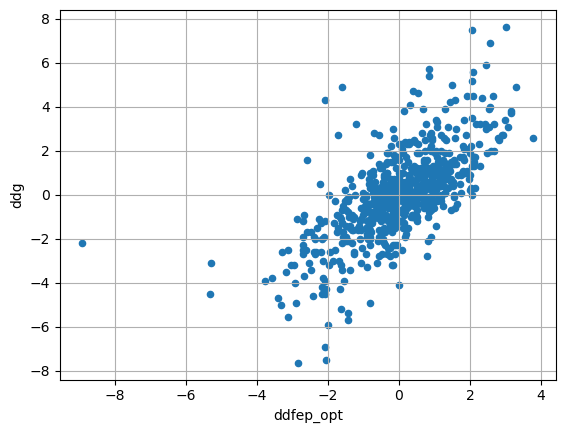

In [59]:
ddfep_opt_plot = ddfep_opt.plot.scatter(x='ddfep_opt',y='ddg', grid=True)

print('RMSE:',math.sqrt(mean_squared_error(ddfep_opt['ddg'],ddfep_opt['ddfep_opt'])))
ddfep_opt[['ddg','ddfep_opt']].corr()

### Crossvalidate

In [60]:
optfep_rsq=cross_val_score(LinearRegression(fit_intercept=True),
                   X_optfep,y,
                   cv=RepeatedStratifiedKFold(n_splits=5,
                                              n_repeats=10,
                                              #shuffle=True,
                                             ).split(X_optfep, y > 0))
optfep_rsq

array([0.45686845, 0.21153431, 0.38830321, 0.49299464, 0.45245512,
       0.11915081, 0.5913896 , 0.45807075, 0.30817362, 0.49271208,
       0.44837561, 0.26533234, 0.49912917, 0.29800048, 0.4439474 ,
       0.35642052, 0.41625043, 0.45665912, 0.35349725, 0.4625454 ,
       0.43884699, 0.45136685, 0.49826833, 0.39742321, 0.26182502,
       0.5158875 , 0.44656923, 0.32396334, 0.28063408, 0.44063961,
       0.40738045, 0.29861227, 0.37510496, 0.47306389, 0.45151183,
       0.41171874, 0.3168917 , 0.35392013, 0.46494777, 0.46151695,
       0.44872607, 0.51122143, 0.31776694, 0.45909203, 0.31230891,
       0.42022116, 0.49899159, 0.39967968, 0.31789788, 0.43883976])

In [61]:
_r=numpy.sqrt(optfep_rsq)
_r.mean(), _r.std()

(0.6305023047414625, 0.07615652312173628)

In [62]:
math.sqrt(optfep_rsq.mean()), optfep_rsq.std()

(0.6350850118671417, 0.0891258236338068)

In [63]:
sum([math.sqrt(_) for _ in optfep_rsq])/len(optfep_rsq)


0.6305023047414625

## Test on S669

In [64]:
_669_foldx = pandas.read_csv(
    "Data_s669_with_predictions.csv",
    index_col=None,
    usecols=["Protein", "PDB_Mut", "FoldX_dir", "FoldX_inv","DDGun3D_dir", "DDG_checked_dir"],
)
_669_foldx["hash"] = _669_foldx.apply(
    lambda x: "_".join([x["Protein"], x["PDB_Mut"]]), axis=1
)
_669_foldx
# list(_669_foldx.columns)

,Protein,PDB_Mut,DDG_checked_dir,FoldX_dir,DDGun3D_dir,FoldX_inv,hash
0,1A0FA,S11A,-1.800,0.551703,0.5,-0.571577,1A0FA_S11A
1,1A7VA,A104H,-2.690,0.562630,-0.1,-0.820657,1A7VA_A104H
2,1A7VA,A66H,-1.980,-0.395478,0.5,-0.228698,1A7VA_A66H
3,1A7VA,A91H,-1.700,0.045107,-0.1,-0.590049,1A7VA_A91H
4,1A7VA,D3H,-1.360,-3.565060,0.2,0.056278,1A7VA_D3H
...,...,...,...,...,...,...,...
664,5JXBA,D329P,-1.440,-0.778776,-0.2,NaN,5JXBA_D329P
665,5OAQA,Y429H,-2.990,-3.408590,-2.4,1.961710,5OAQA_Y429H
666,5VP3A,R39K,0.413,-0.621078,-1.0,0.093390,5VP3A_R39K
667,5VP3A,S128G,-0.378,-1.227820,-0.8,-0.960481,5VP3A_S128G


In [65]:
_669_ok = pandas.read_csv("s669_muts.csv").drop(["Unnamed: 0"], axis=1)
# _669_ok['pdb_code']=_669_ok.apply(lambda x: x['pdb_code'].upper() , axis=1)
_669_ok["hash"] = _669_ok.apply(
    lambda x: "_".join(
        [
            "".join([x["pdb_code"].upper(), x["chain"]]),
            "".join([x["from_aa"], str(x["position"]), x["to_aa"]]),
        ]
    ),
    axis=1,
)
_669_ok

,ddg,pdb_code,chain,position,from_aa,to_aa,hash
0,-1.800,1a0f,A,11,S,A,1A0FA_S11A
1,-2.690,1a7v,A,104,A,H,1A7VA_A104H
2,-1.980,1a7v,A,66,A,H,1A7VA_A66H
3,-1.700,1a7v,A,91,A,H,1A7VA_A91H
4,-1.360,1a7v,A,3,D,H,1A7VA_D3H
...,...,...,...,...,...,...,...
664,-1.440,5jxb,A,329,D,P,5JXBA_D329P
665,-2.990,5oaq,A,429,Y,H,5OAQA_Y429H
666,0.413,5vp3,A,39,R,K,5VP3A_R39K
667,-0.378,5vp3,A,128,S,G,5VP3A_S128G


In [66]:
foldx_s669 = pandas.merge(_669_foldx, _669_ok, on="hash")
foldx_s669

,Protein,PDB_Mut,DDG_checked_dir,FoldX_dir,DDGun3D_dir,FoldX_inv,hash,ddg,pdb_code,chain,position,from_aa,to_aa
0,1A0FA,S11A,-1.800,0.551703,0.5,-0.571577,1A0FA_S11A,-1.800,1a0f,A,11,S,A
1,1A7VA,A104H,-2.690,0.562630,-0.1,-0.820657,1A7VA_A104H,-2.690,1a7v,A,104,A,H
2,1A7VA,A66H,-1.980,-0.395478,0.5,-0.228698,1A7VA_A66H,-1.980,1a7v,A,66,A,H
3,1A7VA,A91H,-1.700,0.045107,-0.1,-0.590049,1A7VA_A91H,-1.700,1a7v,A,91,A,H
4,1A7VA,D3H,-1.360,-3.565060,0.2,0.056278,1A7VA_D3H,-1.360,1a7v,A,3,D,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,5JXBA,D329P,-1.440,-0.778776,-0.2,NaN,5JXBA_D329P,-1.440,5jxb,A,329,D,P
665,5OAQA,Y429H,-2.990,-3.408590,-2.4,1.961710,5OAQA_Y429H,-2.990,5oaq,A,429,Y,H
666,5VP3A,R39K,0.413,-0.621078,-1.0,0.093390,5VP3A_R39K,0.413,5vp3,A,39,R,K
667,5VP3A,S128G,-0.378,-1.227820,-0.8,-0.960481,5VP3A_S128G,-0.378,5vp3,A,128,S,G


In [67]:
foldx_s669[['ddg','DDG_checked_dir','FoldX_dir', 'FoldX_inv']].corr()

,ddg,DDG_checked_dir,FoldX_dir,FoldX_inv
ddg,1.000000,0.991382,0.219539,-0.218011
DDG_checked_dir,0.991382,1.000000,0.214081,-0.217521
FoldX_dir,0.219539,0.214081,1.000000,-0.199287
FoldX_inv,-0.218011,-0.217521,-0.199287,1.000000


In [68]:
for _ in sorted(aa_labels):
    foldx_s669[_]=0
foldx_s669=foldx_s669.apply(encode_mutation, axis=1)
ddgun_s669=deepcopy(foldx_s669)

In [69]:
foldx_s669.notna()

,Protein,PDB_Mut,DDG_checked_dir,FoldX_dir,DDGun3D_dir,FoldX_inv,hash,ddg,pdb_code,chain,...,M,N,P,Q,R,S,T,V,W,Y
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,True,True,True,True,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
665,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
666,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
667,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [70]:
#remove Nan 
foldx_s669=deepcopy(foldx_s669.dropna())
foldx_s669.shape

(659, 33)

In [71]:
X669_optfep= foldx_s669[['FoldX_dir']+sorted(aa_labels)].to_numpy()
X669_optfep.shape

(659, 21)

In [72]:
foldx_s669['ddfep_opt']=dd_optfep_model.predict(X669_optfep)

RMSE: 1.803458081083658


,ddg,ddfep_opt
ddg,1.000000,0.308926
ddfep_opt,0.308926,1.000000


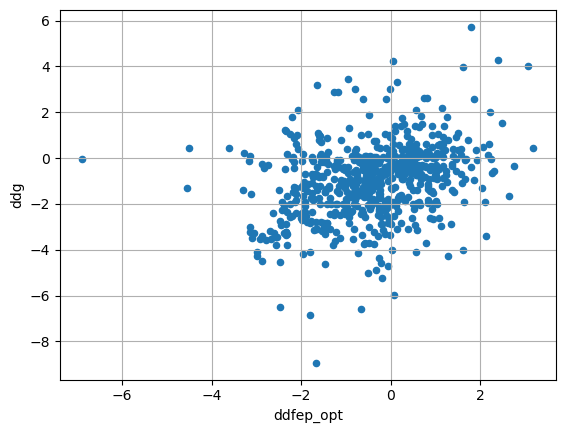

In [73]:
foldx_s669_plot = foldx_s669.plot.scatter(x='ddfep_opt',y='ddg', grid=True)
print('RMSE:',math.sqrt(mean_squared_error(foldx_s669['ddg'],foldx_s669['ddfep_opt'])))
foldx_s669[['ddg','ddfep_opt']].corr()

## S461

In [74]:
s461_df=pandas.read_csv('s461_muts.csv',sep=' ')
s461_hashes=set(s461_df.apply(lambda x: '_'.join([x['pdb'],x['mut']]),axis=1))
#s461_hashes

In [75]:
foldx_s669['s461']=foldx_s669['hash'].apply(lambda x: x in s461_hashes)
foldx_s669.head()

,Protein,PDB_Mut,DDG_checked_dir,FoldX_dir,DDGun3D_dir,FoldX_inv,hash,ddg,pdb_code,chain,...,P,Q,R,S,T,V,W,Y,ddfep_opt,s461
0,1A0FA,S11A,-1.80,0.551703,0.5,-0.571577,1A0FA_S11A,-1.80,1a0f,A,...,0,0,0,-1,0,0,0,0,0.293468,True
1,1A7VA,A104H,-2.69,0.562630,-0.1,-0.820657,1A7VA_A104H,-2.69,1a7v,A,...,0,0,0,0,0,0,0,0,-0.042158,False
2,1A7VA,A66H,-1.98,-0.395478,0.5,-0.228698,1A7VA_A66H,-1.98,1a7v,A,...,0,0,0,0,0,0,0,0,-0.404879,False
3,1A7VA,A91H,-1.70,0.045107,-0.1,-0.590049,1A7VA_A91H,-1.70,1a7v,A,...,0,0,0,0,0,0,0,0,-0.238082,False
4,1A7VA,D3H,-1.36,-3.565060,0.2,0.056278,1A7VA_D3H,-1.36,1a7v,A,...,0,0,0,0,0,0,0,0,-1.447118,False


RMSE: 1.5390235582513112


,ddg,ddfep_opt
ddg,1.000000,0.377373
ddfep_opt,0.377373,1.000000


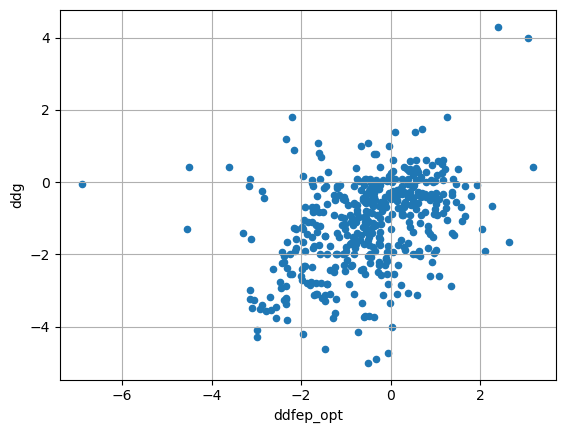

In [76]:
foldx_s461= foldx_s669[foldx_s669['s461']]
foldx_s461_plot = foldx_s461.plot.scatter(x='ddfep_opt',y='ddg', grid=True)
print('RMSE:',math.sqrt(mean_squared_error(foldx_s461['ddg'],foldx_s461['ddfep_opt'])))
foldx_s461[['ddg','ddfep_opt']].corr()